Point 1 is Pikachu
Point 2 is Pikachu
Point 3 is Pikachu
Point 4 is Pichu


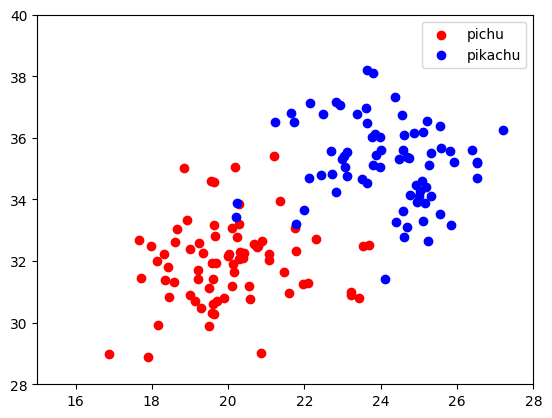

In [5]:
import csv
import matplotlib.pyplot as plt
import math

def turn_string_into_float(number):
    numbers = "0123456789"
    new_number = ""
    for i in number:
        if i in numbers or i == ".":
            new_number += i
    return float(new_number)

pichu_width = []
pichu_height = []
pikachu_width = []
pikachu_height = []

with open("../Data/datapoints.csv", "r") as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        if row["label"] == " 0":
            pichu_width.append(turn_string_into_float(row["width(cm)"]))
            pichu_height.append(turn_string_into_float(row["height(cm)"]))
        elif row["label"] == " 1":
            pikachu_width.append(turn_string_into_float(row["width(cm)"]))
            pikachu_height.append(turn_string_into_float(row["height(cm)"]))

plt.scatter(pichu_width, pichu_height, color="red",label="pichu")
plt.scatter(pikachu_width, pikachu_height, color="blue", label="pikachu")
plt.legend()
plt.ylim(28, 40)
plt.xlim(15, 28)

test_point_width = []
test_point_height = [] 

with open("../Data/test_points.csv", "r") as testfile:
    csvreader = csv.DictReader(testfile)
    for row in csvreader:
        test_point_width.append(turn_string_into_float(row["width"]))
        test_point_height.append(turn_string_into_float(row["height"]))

distance_list_pichu = []
distance_list_pikachu = []

for i in list(range(len(test_point_height))):
    for j in list(range(len(pichu_height))):
        distance_pichu = math.sqrt((test_point_width[i] - pichu_width[j]) ** 2 + (test_point_height[i] - pichu_height[j]) ** 2)
        distance_list_pichu.append(distance_pichu)
        distance_pikachu = math.sqrt((test_point_width[i] - pikachu_width[j]) ** 2 + (test_point_height[i] - pikachu_height[j]) ** 2)
        distance_list_pikachu.append(distance_pikachu)

for i in list(range(len(test_point_height))):
    new_list_pichu = distance_list_pichu[i*len(pichu_height):(i+1)*len(pichu_height)]
    new_list_pikachu = distance_list_pikachu[i*len(pikachu_height):(i+1)*len(pikachu_height)]
    new_list_pichu.sort()
    new_list_pikachu.sort()
    if new_list_pikachu[0] < new_list_pichu[0]:
        print(f'Point {i+1} is Pikachu')
    elif new_list_pikachu[0] > new_list_pichu[0]:
        print(f'Point {i+1} is Pichu')



# Grunduppgift

Point 1 is Pikachu
Point 2 is Pikachu
Point 3 is Pikachu
Point 4 is Pichu


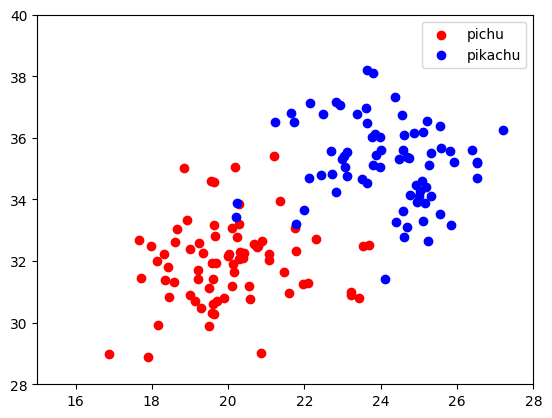

In [6]:
import csv
import matplotlib.pyplot as plt
import math

def turn_string_into_float(number):
    numbers = "0123456789"
    new_number = ""
    for i in number:
        if i in numbers or i == ".":
            new_number += i
    return float(new_number)

def distance_formula(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def create_distance_list(test_point_width, test_point_height, pichu_or_pikachu_width, pichu_or_pikachu_height):

    distance_list = []
    for i in list(range(len(test_point_width))):
        for j in list(range(len(pichu_or_pikachu_width))):
            distance_list.append(distance_formula(test_point_width[i], test_point_height[i], pichu_or_pikachu_width[j], pichu_or_pikachu_height[j]))
    return distance_list

def check_closest_distance(pichu_list, pikachu_list, test_points_amount):
    for i in list(range(test_points_amount)):
        new_list_pichu = pichu_list[i*(len(pichu_list)//int(test_points_amount)):(i+1)*(len(pichu_list)//int(test_points_amount))]
        new_list_pikachu = pikachu_list[i*(len(pikachu_list)//int(test_points_amount)):(i+1)*(len(pikachu_list)//int(test_points_amount))]
        new_list_pichu.sort()
        new_list_pikachu.sort()
        if new_list_pikachu[0] < new_list_pichu[0]:
            print(f'Point {i+1} is Pikachu')
        elif new_list_pikachu[0] > new_list_pichu[0]:
            print(f'Point {i+1} is Pichu')

def run_procces(file_path_1, file_path_2):
    pichu_width = []
    pichu_height = []
    pikachu_width = []
    pikachu_height = []

    with open(file_path_1, "r") as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row["label"] == " 0":
                pichu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pichu_height.append(turn_string_into_float(row["height(cm)"]))
            elif row["label"] == " 1":
                pikachu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pikachu_height.append(turn_string_into_float(row["height(cm)"]))

    test_point_width = []
    test_point_height = [] 

    with open(file_path_2, "r") as testfile:
        csvreader = csv.DictReader(testfile)
        for row in csvreader:
            test_point_width.append(turn_string_into_float(row["width"]))
            test_point_height.append(turn_string_into_float(row["height"]))
    
    pichu_distances = create_distance_list(test_point_width, test_point_height, pichu_width, pichu_height)
    pikachu_distances = create_distance_list(test_point_width, test_point_height, pikachu_width, pikachu_height)

    check_closest_distance(pichu_distances, pikachu_distances, 4)

    plt.scatter(pichu_width, pichu_height, color="red",label="pichu")
    plt.scatter(pikachu_width, pikachu_height, color="blue", label="pikachu")
    plt.legend()
    plt.ylim(28, 40)
    plt.xlim(15, 28)

run_procces("../Data/datapoints.csv", "../Data/test_points.csv")


## Exercise 1

In [6]:
import csv
import matplotlib.pyplot as plt
import math

def turn_string_into_float(number):
    numbers = "0123456789"
    new_number = ""
    for i in number:
        if i in numbers or i == ".":
            new_number += i
    return float(new_number)

def distance_formula(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def create_distance_list(test_point_width, test_point_height, pichu_or_pikachu_width, pichu_or_pikachu_height):

    distance_list = []

    for j in list(range(len(pichu_or_pikachu_width))):
        distance_list.append(distance_formula(test_point_width, test_point_height, pichu_or_pikachu_width[j], pichu_or_pikachu_height[j]))
    return distance_list

def check_closest_distance(pichu_list, pikachu_list, test_points_amount):
    for i in list(range(test_points_amount)):
        new_list_pichu = pichu_list[i*len(pichu_list):(i+1)*len(pichu_list)]
        new_list_pikachu = pikachu_list[i*len(pikachu_list):(i+1)*len(pikachu_list)]
        new_list_pichu.sort()
        new_list_pikachu.sort()
        if new_list_pikachu[0] < new_list_pichu[0]:
            print(f'Point {i+1} is Pikachu')
        elif new_list_pikachu[0] > new_list_pichu[0]:
            print(f'Point {i+1} is Pichu')

def run_procces(file_path):
    while True:
        try:
            width_user_input = float(input("Enter your width: "))
            if width_user_input < 0:
                print("Your input was a negative number. Please enter a positive number.")
            else: break
        except ValueError:
            print("You entered a non-numeric value!")

    while True:
        try:
            height_user_input = float(input("Enter your height: "))
            if height_user_input < 0:
                print("Your input was a negative number. Please enter a positive number.")
            else: break
        except ValueError:
            print("You entered a non-numeric value!")
    
    pichu_width = []
    pichu_height = []
    pikachu_width = []
    pikachu_height = []

    with open(file_path, "r") as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            if row["label"] == " 0":
                pichu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pichu_height.append(turn_string_into_float(row["height(cm)"]))
            elif row["label"] == " 1":
                pikachu_width.append(turn_string_into_float(row["width(cm)"]))
                if " " in row["height(cm)"]:
                    pikachu_height.append(turn_string_into_float(row["height(cm)"]))
    
    pichu_distances = create_distance_list(width_user_input, height_user_input, pichu_width, pichu_height)
    pikachu_distances = create_distance_list(width_user_input, height_user_input, pikachu_width, pikachu_height)

    check_closest_distance(pichu_distances, pikachu_distances, 1)

run_procces("../Data/datapoints.csv")


You entered a non-numeric value!
Your input was a negative number. Please enter a positive number.
You entered a non-numeric value!
Point 1 is Pichu


# Exercise 2